# ❓ <font color='green'> <u> PROBLEM STATEMENT (Airlines_Data) </u>

## 🔵 <font color='blue'> Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u>WHAT IS FORECAASTING?</u></font> 
    + #### Forecasting is the process of making INFORMED PREDICTIONS based on past and present data as the main input for determining the course of future trends. Forecasting highly depends on the nature of the data, and the process is usually performed on historical data. The more simplified it is, the more accurate the forecasting becomes.

+ ### <font color='candy'><u> FORECASTING METHODS:
    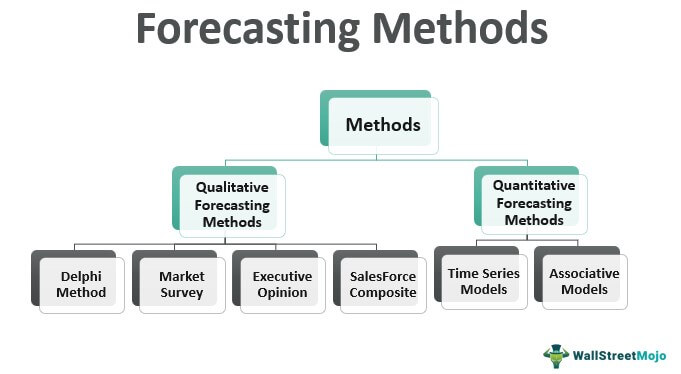
    
+ ### <font color='candy'><u> TIME SERIES FORECASTING:
     + #### Time series forecasting means assessing the time-stamped data using statistical calculations and modeling to make predictions and induce strong strategic decision-making. 
     + #### Since the historical data has a pattern, it becomes evident that the data in the future should also have a pattern, and this method looks at cracking the pattern in the future so that there is very little deviance from the actual calculations and the outcomes in the real world.
    + #### The process is widely adopted in many sectors, for example, sales forecasting and weather forecasting. Examples of time series methods used for forecasting are Autoregression (AR), Moving Average (MA), Autoregressive Moving Average (ARMA), and Autoregressive Integrated Moving Average (ARIMA). 

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette='viridis')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [3]:
df.shape

(96, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [6]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
df.nunique()

Month         96
Passengers    80
dtype: int64

In [8]:
df.duplicated().sum()

0

> * #### We have Airlines Passenger's monthly data from 1995 to 2002.
> * #### There are total 96 non null records. 
> * #### Mean sales for this period is 213 passengers
> * #### There is no duplicated record found.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* ##### <font color ='green'> <u> TREND
A trend represents a long-term movement or direction in the data over time. It captures the underlying pattern that persists over an extended period. Trends are Exponential and Quadratic

* ##### <font color ='green'> <u> SEASONALITY    
Seasonality refers to regular and predictable variations in the data that occur at specific intervals. These intervals could be daily, weekly, monthly, or even yearly, depending on the nature of the data.Seasonal patterns often repeat over a fixed period, and they are typically associated with external factors like weather, holidays, or other recurring events. Type of Seasonality are Additive and Multiplicatve Seasonality.

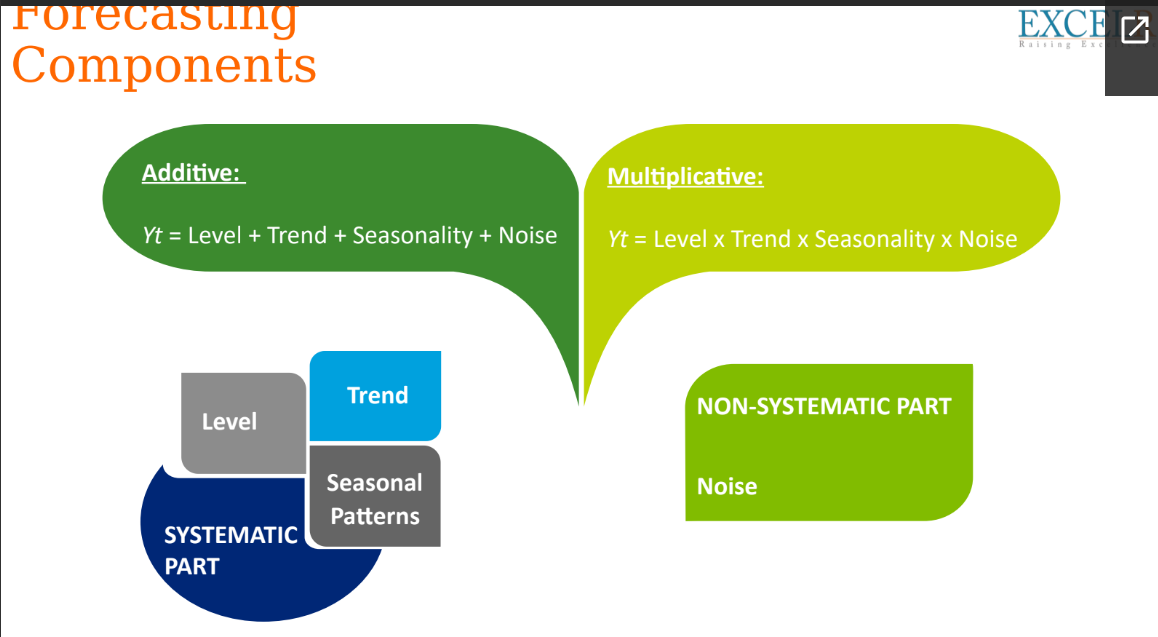

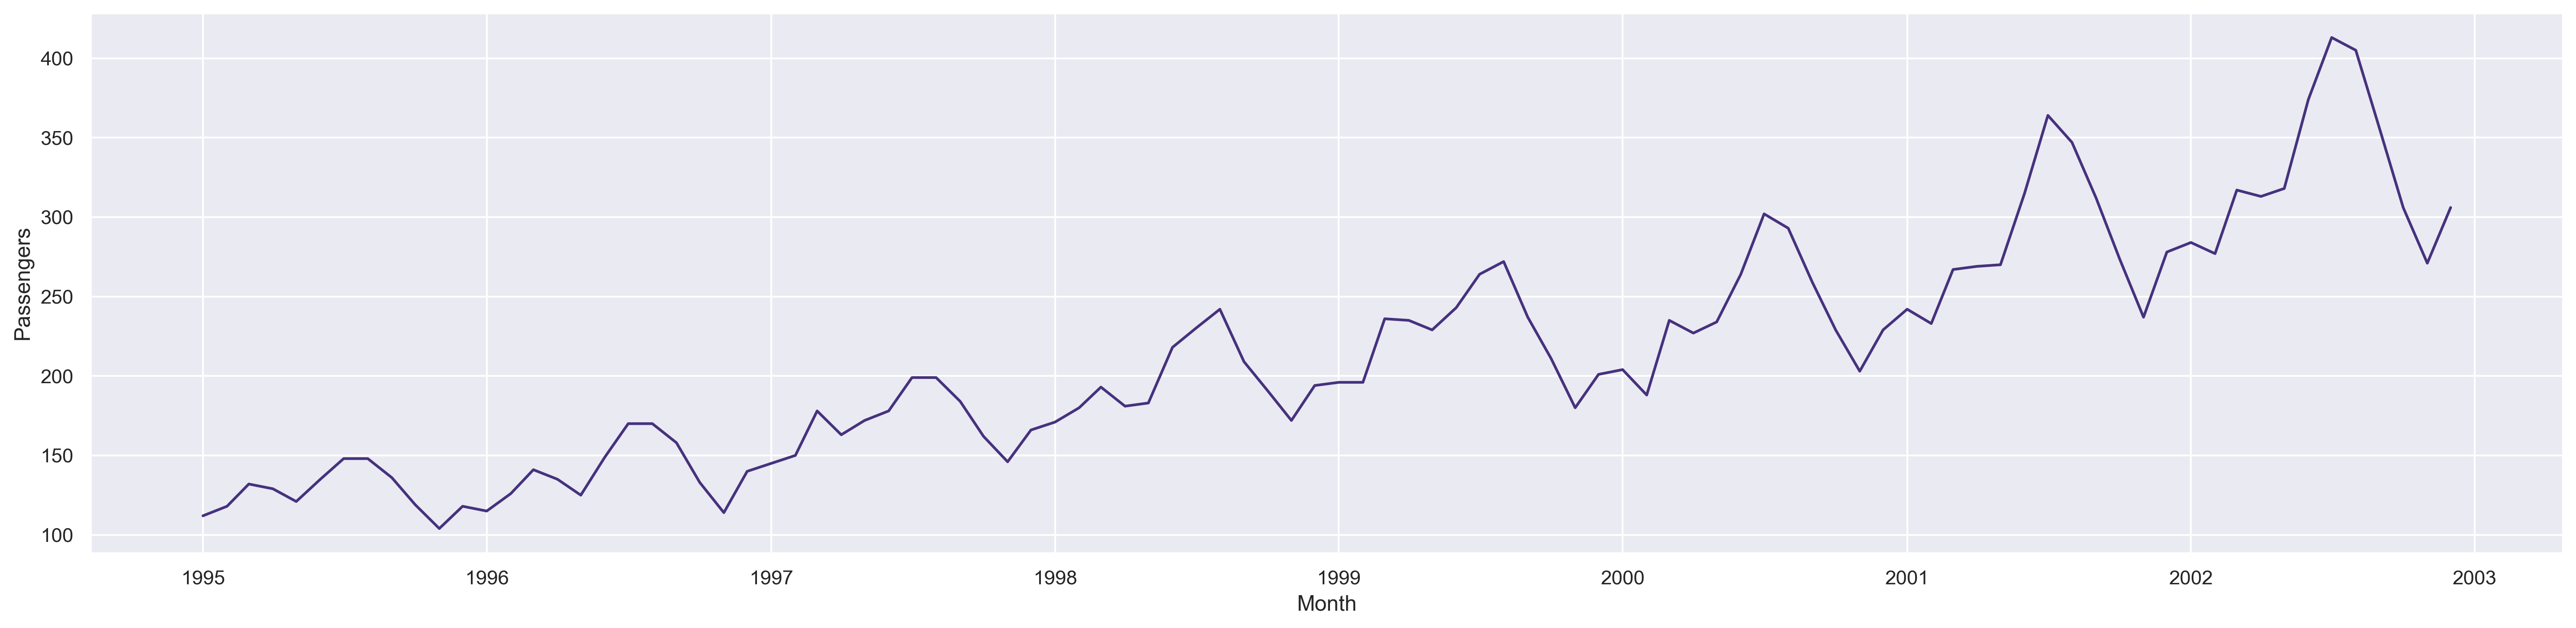

In [9]:
# Line plot to Visualise Trend and Seasonality 
sns.lineplot(x = df['Month'], y = df['Passengers'])
plt.tight_layout()

> * #### We can see there is Linear Upward Trend and Multiplicative Seasonality pattern in line plot.

<Axes: xlabel='Passengers', ylabel='Density'>

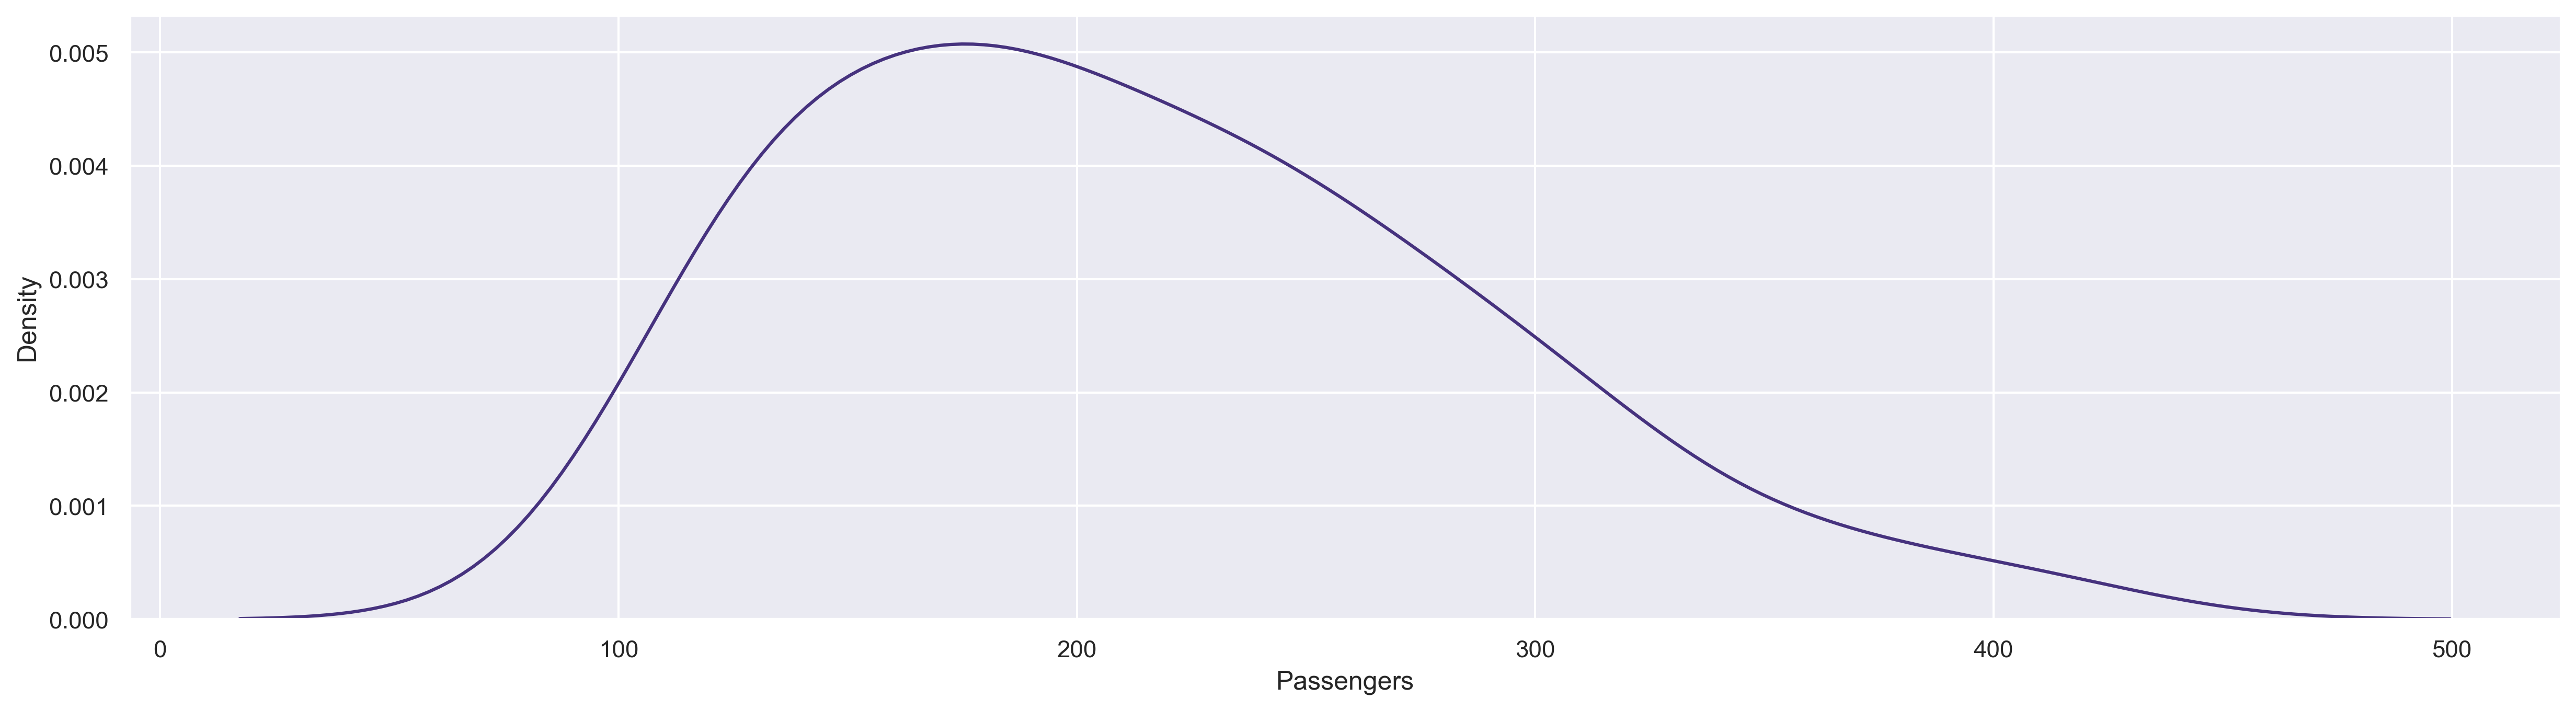

In [10]:
# kde plot for data distribution 
sns.kdeplot(df['Passengers'])

> * #### Data has slight positive skewness.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

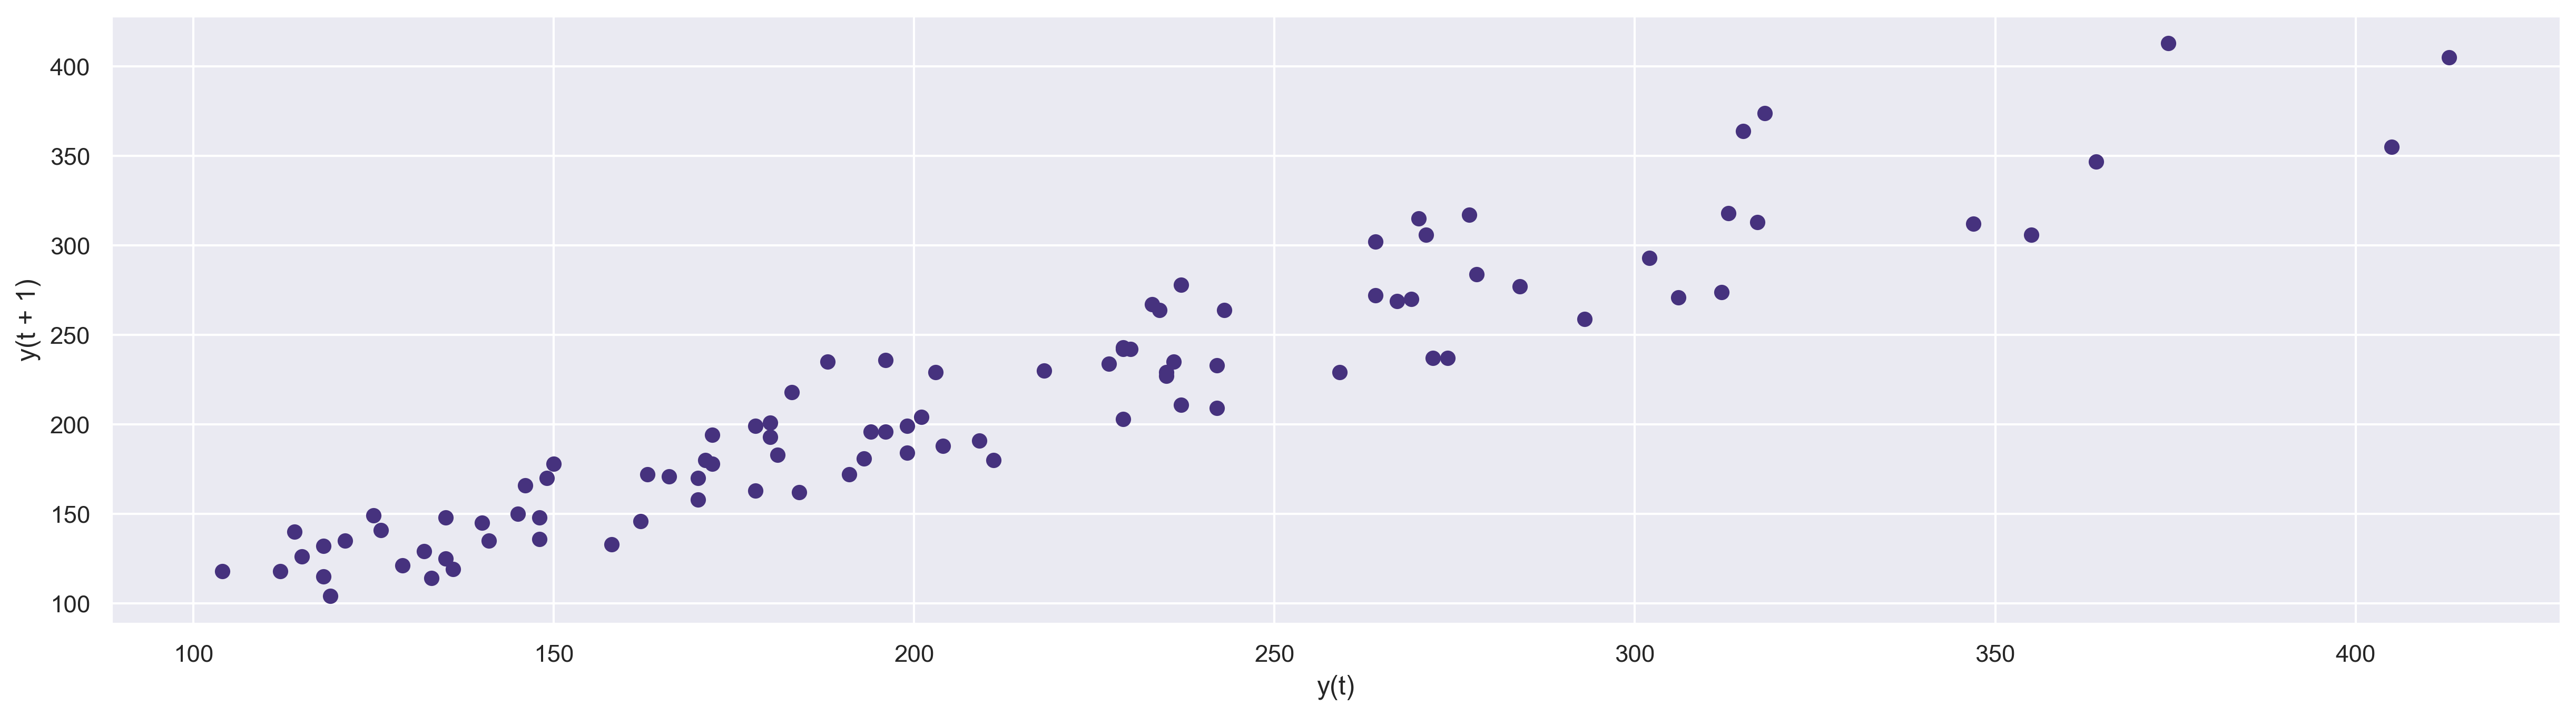

In [11]:
# Lag plot for visualising dependence on previous data
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])

> * #### There is positive upward trend in Lag plot indicates that last Months's number of Passengers affect the current Passenger's count.

* ##### <font color ='green'> <u> Autocorrelation:
   + ##### Autocorrelation shows the correlation of a sequence with itself lagged by some number of time units. 
   + ##### Autocorrelation plot, X-axis shows the lag number, and Y-axis shows the correlation of the sequence with a sequence at that lag. Y-axis ranges from -1 to 1.

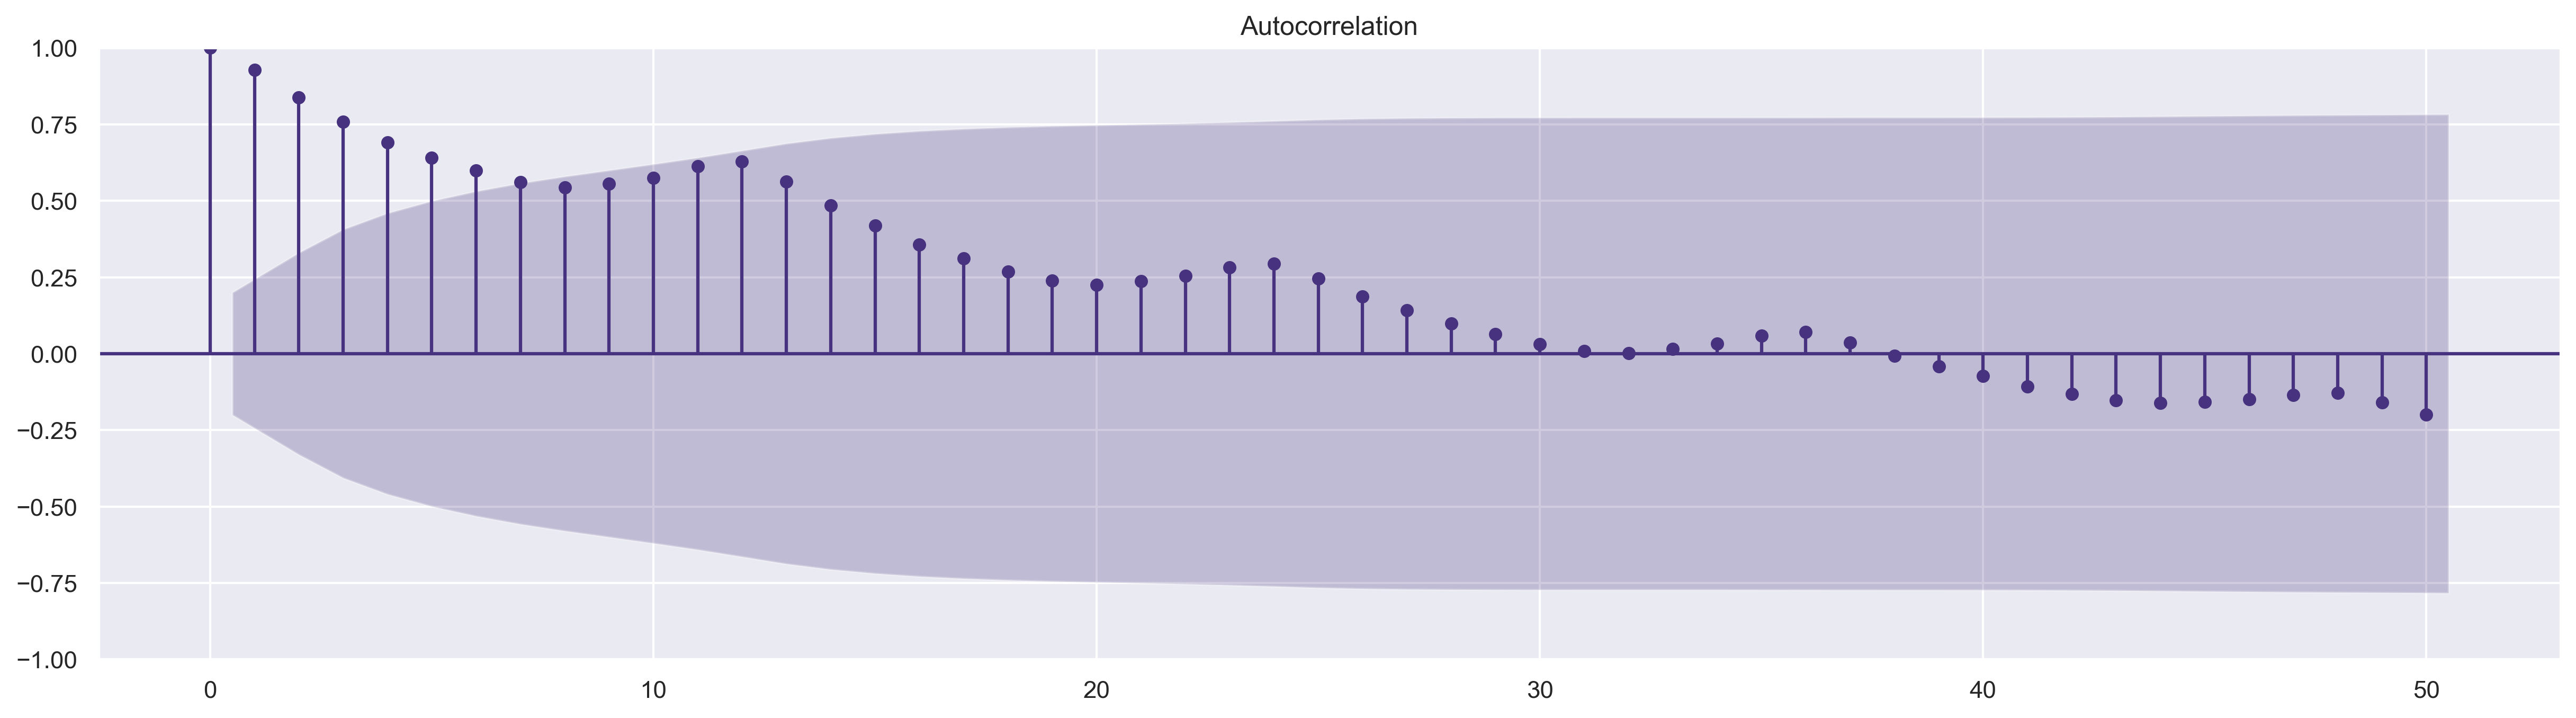

In [12]:
# Autocorrelation plot
plot_acf(df['Passengers'], lags = 50)
plt.show()

> * #### First six Lag Variables are crossing the positive standard error, so we can interpret that the previous six months's passenger's data affect directly and indirectly the current month's passenger's data.

* ##### <font color ='green'> <u> Partial Autocorrelation Function:
    + ##### It does the same as regular autocorrelation — shows the correlation of a sequence with itself lagged by some number of time units. But there’s a twist. Only the direct effect is shown, and all intermediary effects are removed.

<Figure size 4800x1800 with 0 Axes>

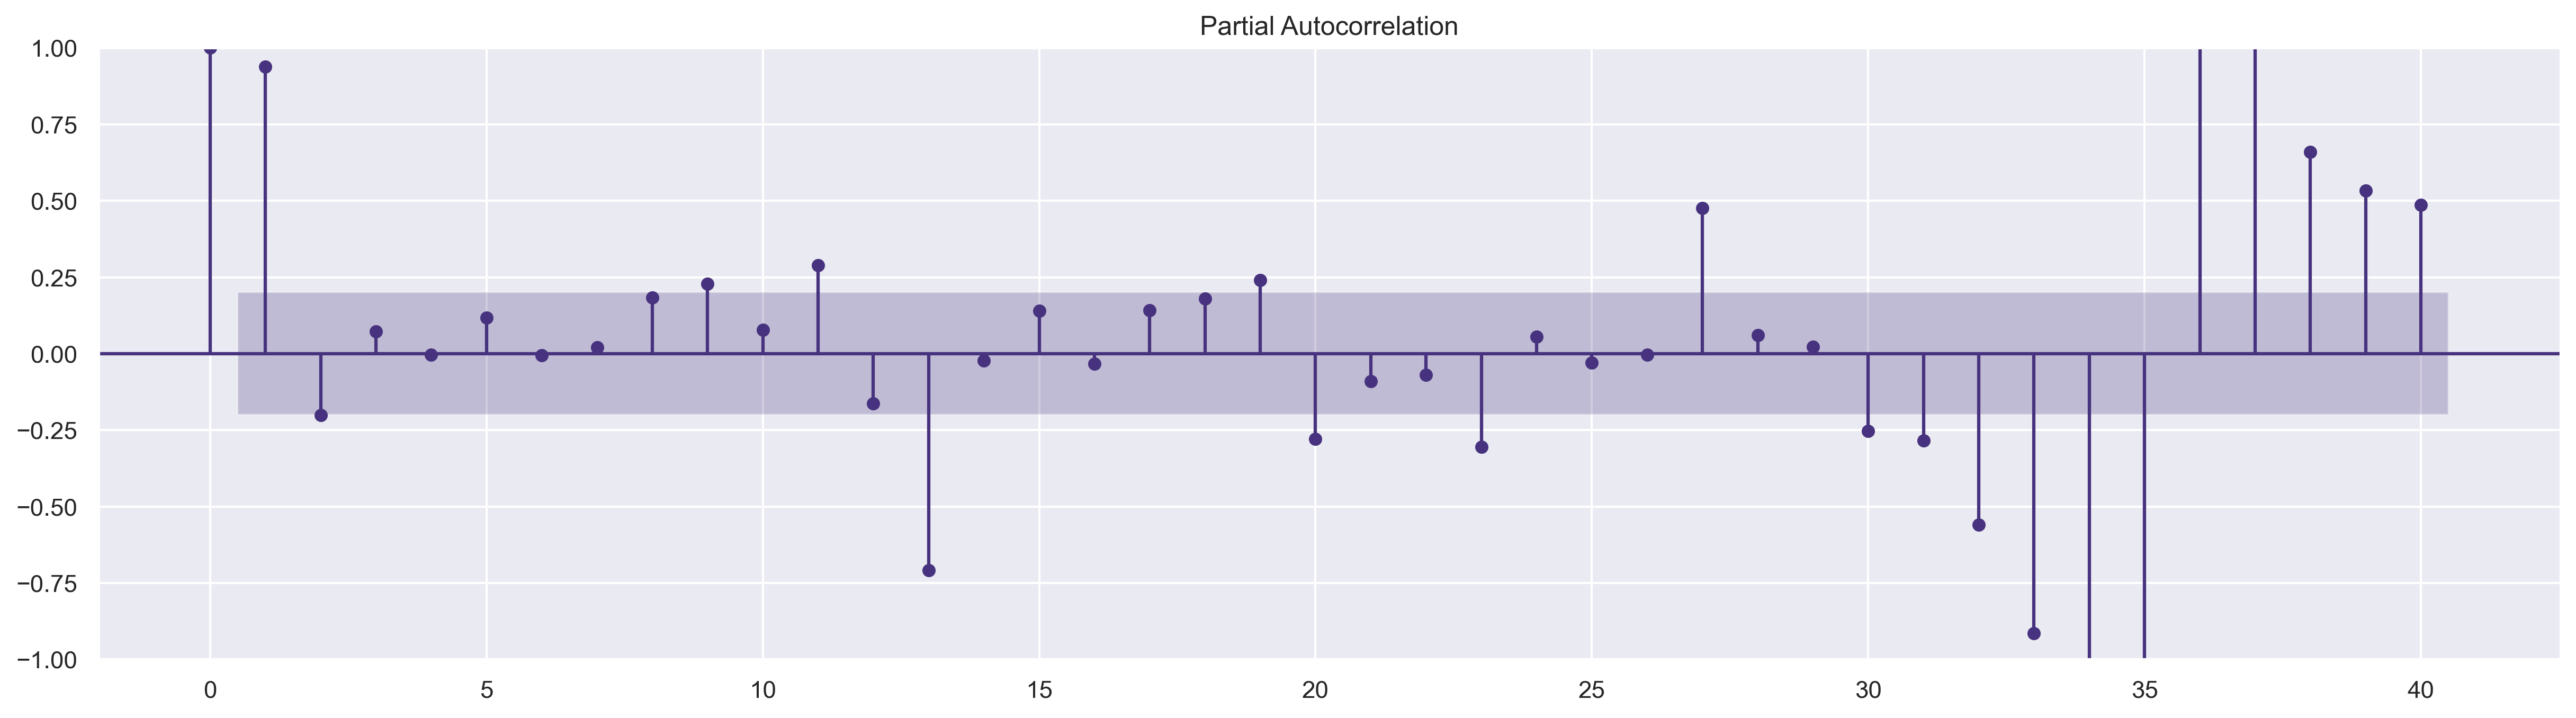

In [13]:
# Plot PACF
plt.figure(figsize=(16,6))
plot_pacf(df['Passengers'], lags = 40)
plt.show()
# Can only compute partial correlations for lags up to 50% of the sample size.

> * #### From PACF Plot we can understand that last months's passenger count affect directly on current months's passenger count.

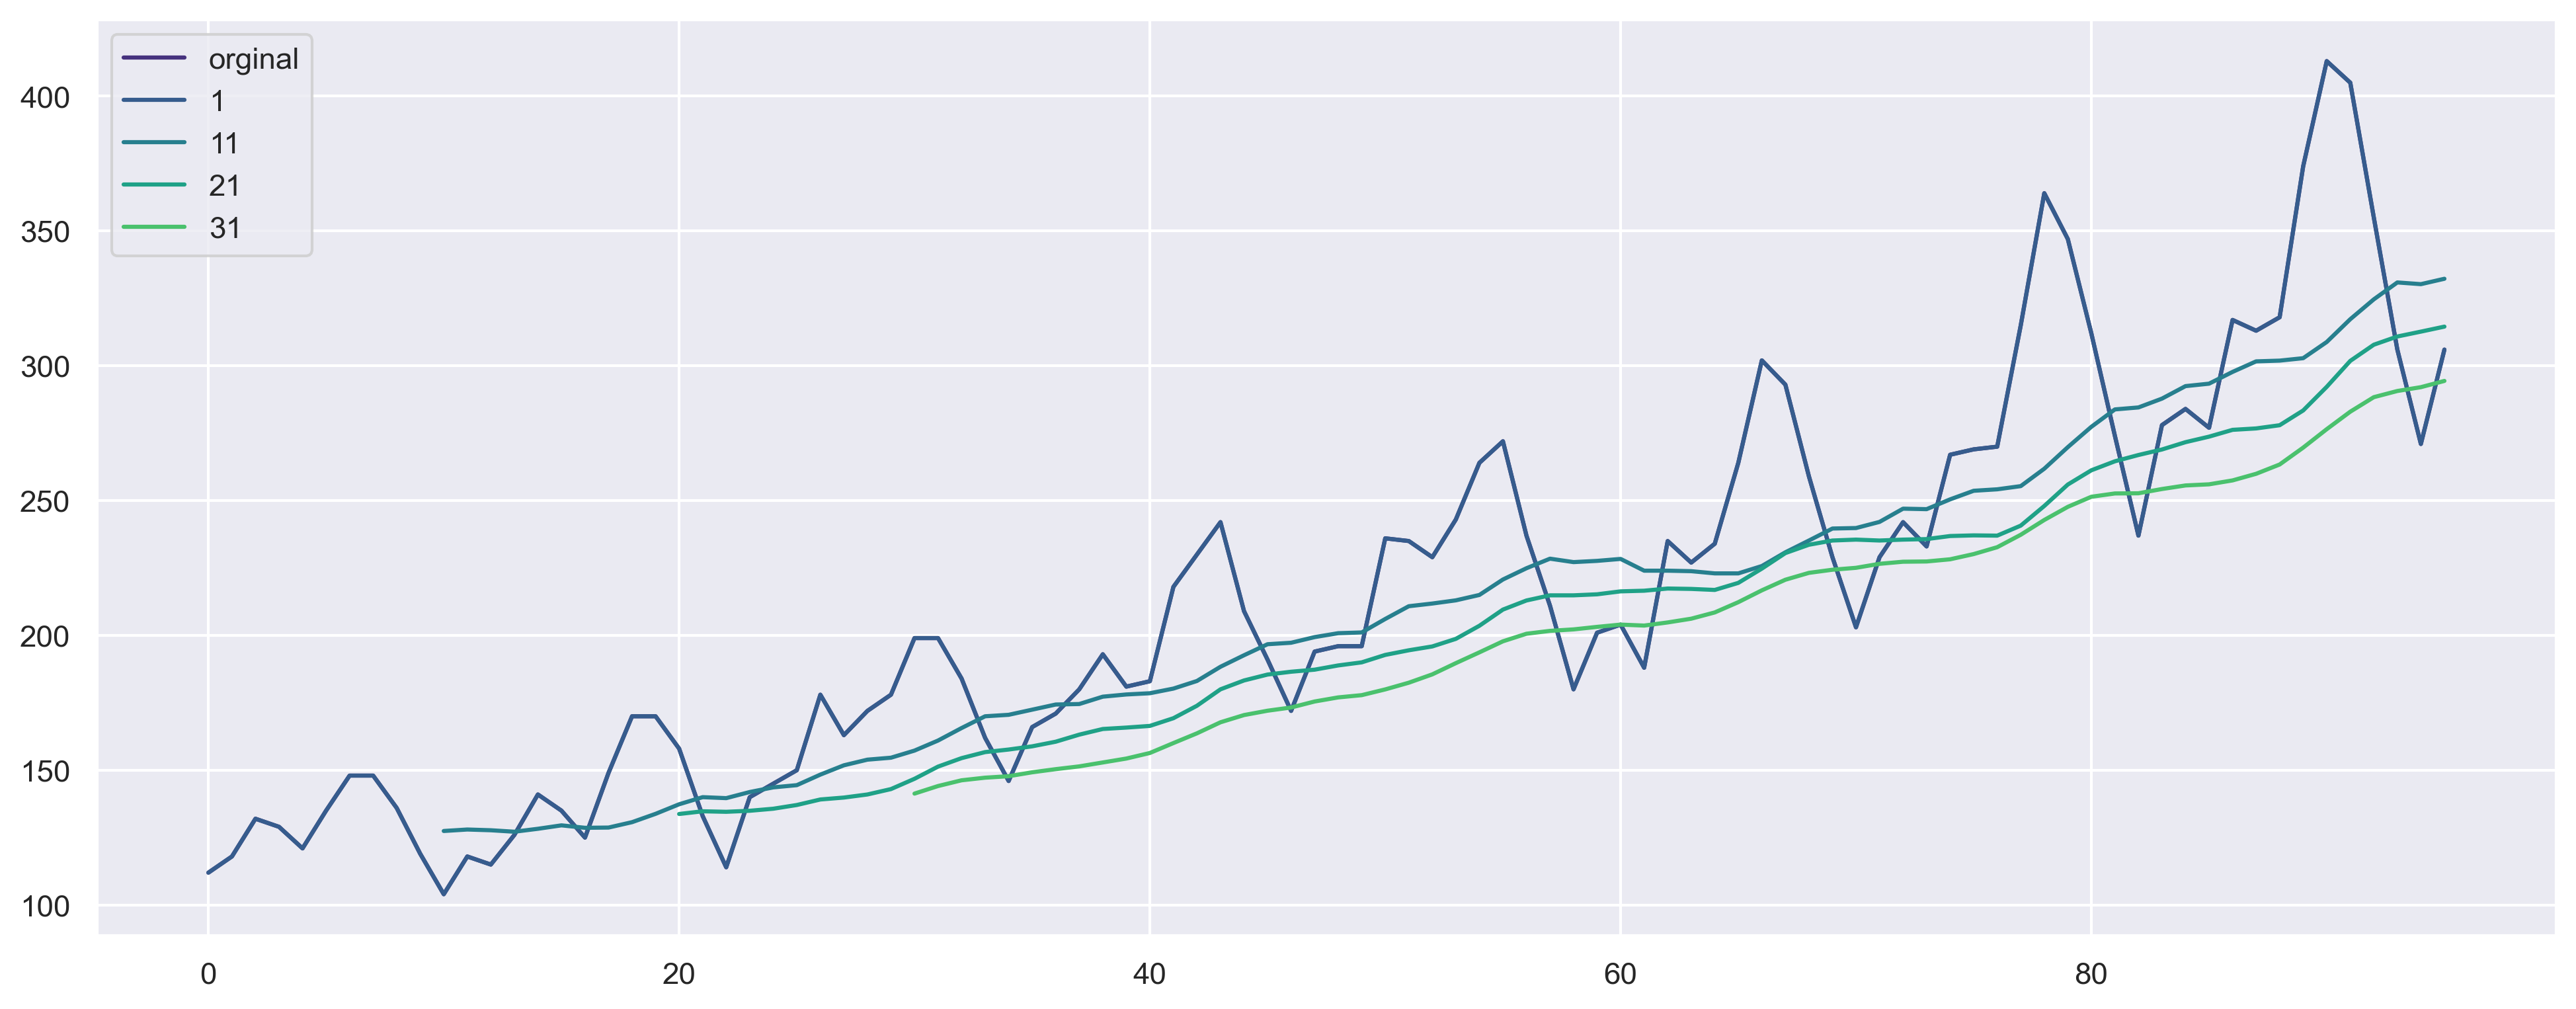

In [14]:
# Moving Average:
plt.figure(figsize = (16,6))
df.Passengers.plot(label = "orginal")
for i in range(1,40,10):
    df["Passengers"].rolling(i).mean().plot(label = str(i))
plt.legend()

> * #### Moving Average removes the Seasonality component and gives overall trend.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Creating Dummy Variables:

In [15]:
df['t'] = range(1,len(df)+1)
df['t_square'] = df['t'] ** 2
df['log_passengers'] = np.log(df['Passengers'])
df.head()

,Month,Passengers,t,t_square,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [16]:
df['Mon'] = df['Month'].dt.month_name()
df.head()

,Month,Passengers,t,t_square,log_passengers,Mon
0,1995-01-01,112,1,1,4.718499,January
1,1995-02-01,118,2,4,4.770685,February
2,1995-03-01,132,3,9,4.882802,March
3,1995-04-01,129,4,16,4.859812,April
4,1995-05-01,121,5,25,4.795791,May


In [17]:
months = pd.get_dummies(data = df['Mon'], prefix='Mon')
df = pd.concat([df,months],axis=1)
df.head()

,Month,Passengers,t,t_square,log_passengers,Mon,Mon_April,Mon_August,Mon_December,Mon_February,Mon_January,Mon_July,Mon_June,Mon_March,Mon_May,Mon_November,Mon_October,Mon_September
0,1995-01-01,112,1,1,4.718499,January,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,February,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,March,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,April,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,0,0,0,0,0,0,0,0,1,0,0,0


### <font color = "green">➡ Train Test Split 

In [18]:
train = df.iloc[:-26]
test = df.iloc[-26:]

In [19]:
print("Shape of Train Data: ",train.shape)
print("Shape of Test Data: ", test.shape)

Shape of Train Data:  (70, 18)
Shape of Test Data:  (26, 18)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

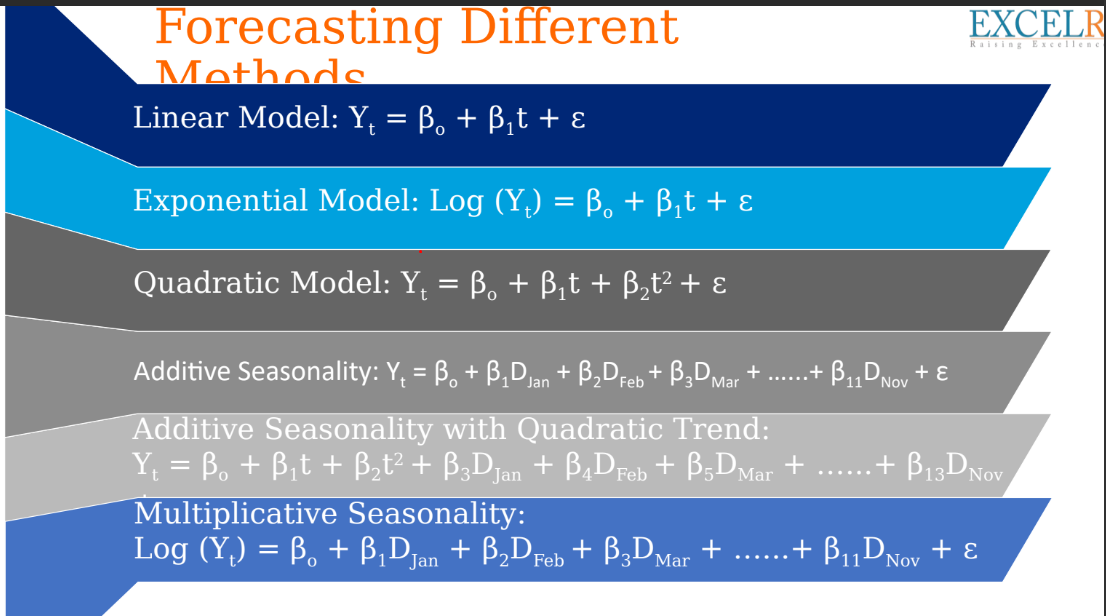

### <font color = "green">1. LINEAR MODEL:

In [20]:
linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))
rmse_linear

48.30985585336209

### <font color = "green">2. EXPONENTIAL MODEL:

In [21]:
exponential_model = smf.ols('log_passengers~t', data = train).fit()
pred_exp = pd.Series(exponential_model.predict(pd.DataFrame(test['t'])))
rmse_exponential = np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exponential

298.12659699761343

### <font color = "green">3. QUADRATIC MODEL:

In [22]:
Quadratic = smf.ols('Passengers~t+t_square', data=train).fit()
pred_Quad = pd.Series(Quadratic.predict(test[["t","t_square"]]))
rmse_Quadratic = np.sqrt(mean_squared_error(test['Passengers'],pred_Quad))
rmse_Quadratic

43.89814496742656

### <font color = "green">4. ADDITIVE SEASONALITY MODEL:

In [23]:
Additive_sea = smf.ols('Passengers~Mon_January+Mon_February+Mon_March+Mon_April+Mon_May+Mon_June+Mon_July+Mon_August+Mon_September+Mon_October+Mon_November', 
                       data=train).fit()
pred_add_sea = pd.Series(Additive_sea.predict(test[["Mon_January","Mon_February","Mon_March","Mon_April","Mon_May","Mon_June",
                                                    "Mon_July","Mon_August","Mon_September","Mon_October","Mon_November"]]))
rmse_Additive_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea))
rmse_Additive_sea

124.97569951828822

### <font color = "green">5. QUADRATIC ADDITIVE SEASONALITY MODEL:

In [24]:
Quadratic_Additive = smf.ols('Passengers~t+t_square+Mon_January+Mon_February+Mon_March+Mon_April+Mon_May+Mon_June+Mon_July+Mon_August+Mon_September+Mon_October+Mon_November', data=train).fit()
pred_quad_add = pd.Series(Quadratic_Additive.predict(test[["Mon_January","Mon_February","Mon_March","Mon_April","Mon_May","Mon_June","Mon_July","Mon_August","Mon_September","Mon_October","Mon_November","t","t_square"]]))
rmse_Quadratic_Additive = np.sqrt(mean_squared_error(test['Passengers'], pred_quad_add))
rmse_Quadratic_Additive 

30.39304289591171

### <font color = "green">6. MULTIPLICATIVE SEASONALITY MODEL:

In [25]:
Multiplicative_sea = smf.ols('log_passengers~Mon_January+Mon_February+Mon_March+Mon_April+Mon_May+Mon_June+Mon_July+Mon_August+Mon_September+Mon_October+Mon_November', data = train).fit()
pred_Mult_sea = pd.Series(Multiplicative_sea.predict(test))
rmse_Multiplicative_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_sea))
rmse_Multiplicative_sea

298.6798189957354

### <font color = "green">7. ARIMA MODEL:

+ #### ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))

+ #### We need to find out the order of arima model (values for p,d,q)

+ #### ARIMA model works on Stationary data. In line chart we can see that there is an exponential increasing Trend. So, Trend is not constant. Variance is also not constant. Hence the time serise is not stationary. So we will convert non stationary data into stationary.

In [26]:
# Test for checking Stationary Data or not:
adfuller(df['Passengers'])[1]

0.9968250481137263

**Null hypothesis: Data is Non stationary**

**Alternate Hypothesis: Data is Stationary**
   
- If p < 0.05 ; Data is stationary

- if p > 0.05; Data is not stationary

**According the p-value, the dataset is non stationary as the p value is greater than alpha value.**

In [27]:
#find out order of arima 
order = auto_arima(df['Passengers'])
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

p = 3, d = 1, q = 2

**differencing(d) is used to make non stationary data into stationary data.**

In [28]:
#Arima model
arima = ARIMA(train['Passengers'], order=(3, 1, 2)).fit()

In [29]:
test

,Month,Passengers,t,t_square,log_passengers,Mon,Mon_April,Mon_August,Mon_December,Mon_February,Mon_January,Mon_July,Mon_June,Mon_March,Mon_May,Mon_November,Mon_October,Mon_September
70,2000-11-01,203,71,5041,5.313206,November,0,0,0,0,0,0,0,0,0,1,0,0
71,2000-12-01,229,72,5184,5.433722,December,0,0,1,0,0,0,0,0,0,0,0,0
72,2001-01-01,242,73,5329,5.488938,January,0,0,0,0,1,0,0,0,0,0,0,0
73,2001-02-01,233,74,5476,5.451038,February,0,0,0,1,0,0,0,0,0,0,0,0
74,2001-03-01,267,75,5625,5.587249,March,0,0,0,0,0,0,0,1,0,0,0,0
75,2001-04-01,269,76,5776,5.594711,April,1,0,0,0,0,0,0,0,0,0,0,0
76,2001-05-01,270,77,5929,5.598422,May,0,0,0,0,0,0,0,0,1,0,0,0
77,2001-06-01,315,78,6084,5.752573,June,0,0,0,0,0,0,1,0,0,0,0,0
78,2001-07-01,364,79,6241,5.897154,July,0,0,0,0,0,1,0,0,0,0,0,0
79,2001-08-01,347,80,6400,5.849325,August,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
arima_pred = arima.predict(start = 70, end = 95)
arima_pred

70    223.720735
71    228.799826
72    234.848740
73    239.081578
74    240.782173
75    241.233428
76    240.887149
77    240.622678
78    240.308830
79    240.269502
80    240.183195
81    240.253457
82    240.220731
83    240.282089
84    240.245170
85    240.286245
86    240.249558
87    240.281320
88    240.250581
89    240.277492
90    240.252512
91    240.275223
92    240.254611
93    240.273501
94    240.256346
95    240.272010
Name: predicted_mean, dtype: float64

In [33]:
rmse_arima = np.sqrt(mean_squared_error(test['Passengers'], arima_pred))

In [34]:
print("RMSE value for ARIMA model is : ", rmse_arima)

RMSE value for ARIMA model is :  78.659755386329


___

* ### <font color = 'blue'> <u> COMPARING THE RMSE VALUES: </u>

In [35]:
Results = {"MODEL":pd.Series(["Linear_model", "Exponential_model", "Quadratic","Additive_sea", "Quadratic_Additive", "Multiplicative_sea", "ARIMA"]),
           "RMSE_Values":pd.Series([rmse_linear, rmse_exponential, rmse_Quadratic, rmse_Additive_sea, rmse_Quadratic_Additive, rmse_Multiplicative_sea, rmse_arima])}
rmse_table = pd.DataFrame(Results)
rmse_table.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,Quadratic_Additive,30.393043
2,Quadratic,43.898145
0,Linear_model,48.309856
6,ARIMA,78.659755
3,Additive_sea,124.975700
1,Exponential_model,298.126597
5,Multiplicative_sea,298.679819


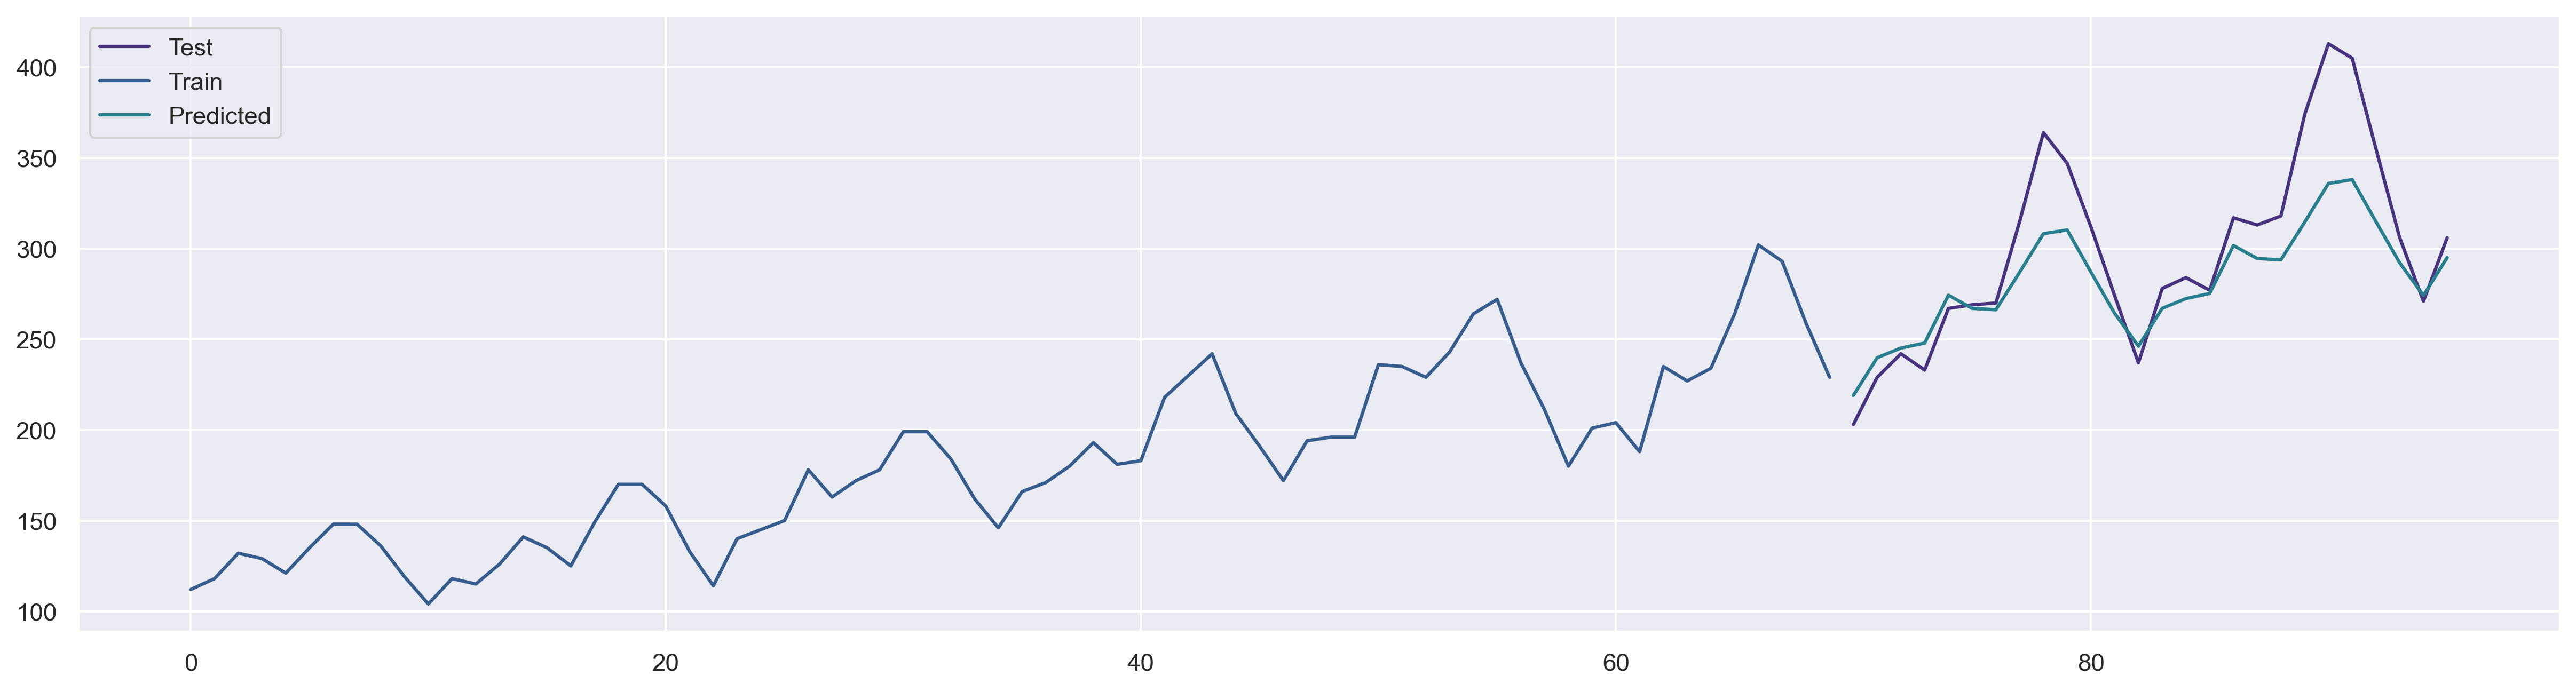

In [36]:
plt.plot(test['Passengers'], label = 'Test')
plt.plot(train['Passengers'], label = 'Train')
plt.plot(pred_quad_add, label = 'Predicted')
plt.legend()

* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### Quadratic Additive Model gives lowest RMSE value among the all models. So we will use this model for final forecasting.
> * #### Machine learning Forecasting helps us to know the trend of data which can not be observed through the visualisations.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___